# <font color='black'>EE25737: Introduction to Machine Learning</font>
## Implementation of some algorithms by NumPy/SciPy

### Shahab Rahimirad
### 95104663

In this assignment, you will implement some important algorithms in Machine Learning only using Linalg and without using scikit-learn.


## 1.Perceptron



In this section, you will classify an binary dataset with perceptron algorithm.

###### Load data


Import data with pandas library.
First 9 columns are your training features. Name them 'X'. 10th column is label. Name it Y.

In [ ]:
import pandas as pd
import numpy as np
## your code to load data
trainData = pd.read_excel('classification_training.xlsx')
validData = pd.read_excel('classification_validation.xlsx')
# X = ....
# Y = ....
X = [np.ones(49)]

#X.append(np.array(list(trainData.index)))
for i in range(9):
    X.append(np.array(list(trainData.iloc[:,i])))
Y = list(trainData.iloc[:,9])
#print(Y)

X_valid = [np.ones(299)]

#X_valid.append(np.array(list(validData.index)))
for i in range(9):
    X_valid.append(np.array(list(validData.iloc[:,i])))
Y_valid = list(validData.iloc[:,9])



###### Initializing necessary variables


In this part initialize variables which you think are necessary.

In [ ]:
## initializing variables
n1 , n2 = 0.1 , 0.0000001


##### Implement perceptron with batch mode gradient descent

In this section, you will implement perceptron alogirithm using all of the training data for updating the weights.
Stop updating when the number of misclassified data does not decrease.
In the end, for each learning-rate, plot the number of misclassified of training data and validation data versus number of iterations.

[39.0, 12.0, 6.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0]
[39.0, 39.0]
42.0
244.0


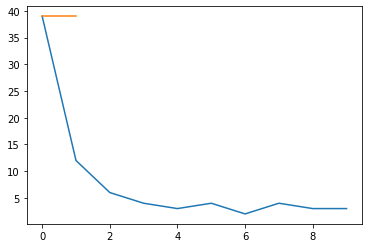

In [ ]:


# initialize a variable to store misclassified data
misclassified = 0
iterationE = []

# write iteration code  
# initilize matrix of perceptron weights 
import random
w = []
for i in range(len(X)):
    w.append(random.random()) # w[0] is for bias
#w = [0]*len(X)

X = np.array(X)
Y = np.array(Y)
w = np.array(w)
def learn(X,Y,w,n):
    iterationE = []
    misclassified = 0
    while True:
        #yperim = w[0]*np.ones(len(Y))
        yperim = 0
        for i in range(10):
           # print(type(X[i]))
            yperim += float(w[i])*X[i]
        yperim = np.sign(yperim)
        #print(yperim)
        E = np.dot(yperim-Y , yperim-Y)
        iterationE.append(E/4)
# stop rule
        if E/4 == misclassified:
            break

# update weights
        c = (Y-yperim).dot(X.transpose())
        c = n*c
        w = w+c
        misclassified = E/4
    return w , iterationE 


# plot
trainwithN1 = learn (X,Y,w,n1)
trainwithN2 = learn(X , Y , w , n2)
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)


yperim = 0
for i in range(10):
    yperim += float(trainwithN1[0][i])*X_valid[i]
yperim = np.sign(yperim)
E1 = np.dot(yperim-Y_valid , yperim-Y_valid)/4

yperim = 0
for i in range(10):
    yperim += float(trainwithN2[0][i])*X_valid[i]
yperim = np.sign(yperim)
E2 = np.dot(yperim-Y_valid , yperim-Y_valid)/4


print(trainwithN1[1])
print(trainwithN2[1])
print(E1)
print(E2)
#print(yperim)

import matplotlib.pyplot as plt
plot1 = plt.plot(trainwithN1[1])
plot2 = plt.plot(trainwithN2[1])

##### Implement perceptron with online mode gradient descent

Do the same as the previous part.
Stopping rule isn't needed here. Just iterate once on training data.

In [ ]:
def learnOnline(X,Y,w,n):
    iterationE = []
    misclassified = 0
    for j in range(49):
        #yperim = w[0]*np.ones(len(Y))
        yperim = 0
        for i in range(10):
           # print(type(X[i]))
            yperim += float(w[i])*X[i][j]
        yperim = np.sign(yperim)
        #print(yperim)
        E = np.dot(yperim-Y[j] , yperim-Y[j])
        iterationE.append(E/4)
# update weights
        c = (Y[j]-yperim)*X[:,j]
        c = n*c
        w = w+c
        misclassified = E/4
    return w , iterationE 

trainwithN1 = learnOnline (X,Y,w,n1)
trainwithN2 = learnOnline(X , Y , w , n2)
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)


yperim = 0
for i in range(10):
    yperim += float(trainwithN1[0][i])*X_valid[i]
yperim = np.sign(yperim)
E1 = np.dot(yperim-Y_valid , yperim-Y_valid)/4

yperim = 0
for i in range(10):
    yperim += float(trainwithN2[0][i])*X_valid[i]
yperim = np.sign(yperim)
E2 = np.dot(yperim-Y_valid , yperim-Y_valid)/4



print(trainwithN1[1])
print(trainwithN2[1])
print(E1)
print(E2)
















[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]
54.0
244.0


## 2. Logistic regression

Load Iris Dataset

In [ ]:
from numpy import genfromtxt
my_data = genfromtxt('Iris.csv', delimiter=',')
X=my_data[:,0:2]
y=my_data[:,2]

Implement the Logistic regression algorithm. You can change everything in the cell below.

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.1, num_iter=100000, fit_intercept=True, verbose=False): ## if fit_intercept==True you should increase the Input dimension by 1
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    def fit (self,X,y) : 
        w =np.array([ 0 , 0 , 0]) #first one for bias
        newX = []
        for i in range(len(X)):
            newX.append(np.array([1] + list(X[i])))
        X = np.array(newX)
        alpha = self.lr
        i = 0
        numberOfrights = []
        while i<self.num_iter:
            #print(w)
            grad =0 
            for j in range(len(X)):
                p = 1/ (1+np.exp(w.dot(X[j])))
                grad = grad + (p-y[j])*X[j]
            #print(grad)
            grad = grad*(-1/len(X))
            w = w - alpha*grad
            numright = 0
            for k in range(len(X)):
                if (w.dot(X[k])>=0 and y[k] == 0)or((w.dot(X[k])<0 and y[k] == 1)):
                    numright+=1
            numberOfrights.append(numright/len(y))
            i+=1
        self.w = w
        return numberOfrights
    def predict_prob (self,X) :
        X = np.array([1] + list(X))
        return 1/ (1+np.exp(self.w.dot(X)))
      ## TODO ##
      
      
    def predict (self,X) :
        X = np.array([1] + list(X))
        if (self.w.dot(X) >= 0):
            return 0
        return 1
      ## TODO ##

Note that you should plot the dataset alongside the seprator line generated by Logistic regression and for different learning rates.

[ 2.99255812 -0.79565162  0.20374684]
[ 0.79147074 -2.96446773  4.83807688]


Text(0.5, 1.0, '1000 iteration lr=0.001')

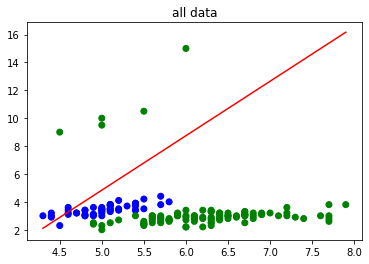

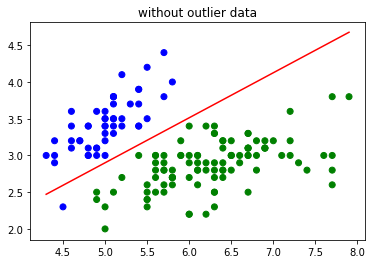

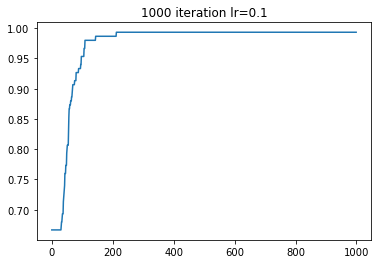

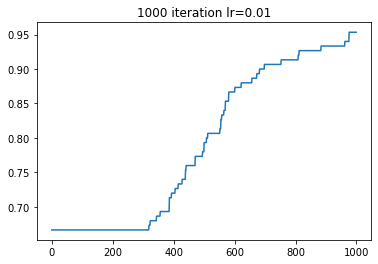

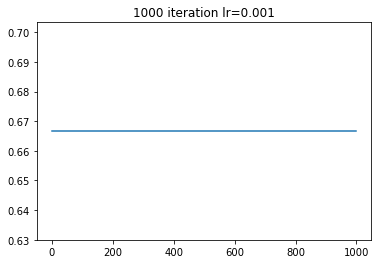

In [ ]:
model = LogisticRegression(num_iter = 1000)
numberOfrights = model.fit(X,y)
print(model.w)
bias , a , b = model.w
#### Plot
import matplotlib.pyplot as plt
plt.figure()
Y_pred = (a/-b)*X[:,0] + (bias/-b)
colors = np.where(y == 1, 'g', 'b')
plot = plt.scatter(X[:,0] , X[:,1] , c = colors)
plot2 = plt.plot([min(X[:,0]), max(X[:,0])], [min(Y_pred), max(Y_pred)], color='red')
plt.title("all data")
#### TO DO #####  

model2 = LogisticRegression(num_iter = 1000)
newX1 = []
newY1 = []
for j in range(len(X)):
    if X[j][1]<8:
        newX1.append(X[j])
        newY1.append(y[j])
newX = np.array(newX1)
newY = np.array(newY1)
numberOfrights = model2.fit(newX,newY)
print(model2.w)
bias2 , a2 , b2 = model2.w
#### Plot
plt.figure()
colors = np.where(newY == 1, 'g', 'b')
Y_pred = (a2/-b2)*newX[:,0] + (bias2/-b2)
plot3 = plt.scatter(newX[:,0] , newX[:,1] , c = colors)
plot4 = plt.plot([min(newX[:,0]), max(newX[:,0])], [min(Y_pred), max(Y_pred)], color='red')
plt.title("without outlier data")
plt.figure()
plt.plot(numberOfrights)
plt.title("1000 iteration lr=0.1")

model3 = LogisticRegression(lr = 0.01 , num_iter = 1000)
numberOfrights = model3.fit(newX,newY)
plt.figure()
plt.plot(numberOfrights)
plt.title("1000 iteration lr=0.01")

model4 = LogisticRegression(lr = 0.001 , num_iter = 1000)
numberOfrights = model4.fit(newX,newY)
plt.figure()
plt.plot(numberOfrights)
plt.title("1000 iteration lr=0.001")

## 3. Linear regression

In this part, you should impelement linear regression on Boston Housing dataset.

In [ ]:
## do not edit this cell ##
import numpy as np

### Load Dataset ###
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston_dataset = load_boston()
X=boston_dataset.data
Y=boston_dataset.target

Impelement Linear regression algorithm. You can change all the parts in the cell below.

---



In [ ]:
class LinearRegression:
    def __init__(self, lr=0.1, num_iter=100000, fit_intercept=True, verbose=False): ## if fit_intercept==True you should increase the Input dimension by 1
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.w = 0
        self.b = 0
        
    def fit (self,X,Y) : 
        lossPerIteration = []
        w = np.zeros((len(X[0]) , 1))
        b = 0
        alpha = self.lr
        i = 0
        while(i < self.num_iter):
            y = []
            for j in range(len(X)):
                y.append(X[j].dot(w)+b)
            y = np.array(y)
            error = np.sum((y - Y)**2) / len(X)
            #print(error)
            lossPerIteration.append(error)
            #b = b - alpha * 2 * np.sum(y - Y)/len(X)
            dm = []
            for k in range(len(X[0])):
                s = 0
                for t in range(len(X)):
                    #print(X[t][k] , (y[t] - Y[t]))
                    s = s+(X[t][k] * (Y[t] - y[t]))
                s = (-2)*s
                s = s/len(X)
                w[k] = w[k] - alpha*s
                b = b- alpha*np.sum(y-Y)/len(X)
            i += 1
            #print(a_1)
        self.w = w
        self.b = b
        #print(a_0)
        #print(w)
        return lossPerIteration
      
      
    def predict (self,X) :
        return X.dot(self.w)+self.b
      ## TODO ##

Split the dataset into the train and test part (with the proportion of 80/20), and fit the model on train data.

In [ ]:
##initialize training data
x_train  = np.array(X[:101])
xmeans = [np.mean(x_train[:,i]) for i in range(13)]
xdiffs = []
for i in range(13): #dataNormalization
    c = np.max(x_train[:,i]) - np.min(x_train[:,i])
    if c!=0:
        xdiffs.append(c)
    else:
        xdiffs.append(1)
for i in range(101):
    for j in range(13):
        x_train[i][j] = (x_train[i][j] - xmeans[j])/xdiffs[j]
y_train = np.array(Y[:101])

##initialize test data
x_test  = np.array(X[101:])
xmeans = [np.mean(x_test[:,i]) for i in range(13)]
xdiffs = []
for i in range(13): #dataNormalization
    c = np.max(x_test[:,i]) - np.min(x_test[:,i])
    if c!=0:
        xdiffs.append(c)
    else:
        xdiffs.append(1)
for i in range(len(x_test)):
    for j in range(13):
        x_test[i][j] = (x_test[i][j] - xmeans[j])/xdiffs[j]
y_test = np.array(Y[101:])

##create models with different rates
model1 = LinearRegression(lr = 0.01 , num_iter = 100)
model2 = LinearRegression(lr = 0.001 , num_iter = 1000)
model3 = LinearRegression(lr = 0.0001 , num_iter = 10000)
model4 = LinearRegression(lr = 0.00001 , num_iter = 100000)
loss_train1 = model1.fit(x_train,y_train)
loss_train2 = model2.fit(x_train,y_train)
loss_train3 = model3.fit(x_train,y_train)
loss_train4 = model4.fit(x_train,y_train)

y1 , y2 , y3 , y4 = [] , [] ,[] , []
for i in range(len(x_test)):
    y1.append(model1.predict(x_test[i]))
    y2.append(model2.predict(x_test[i]))
    y3.append(model3.predict(x_test[i]))
    y4.append(model4.predict(x_test[i]))
loss_test1 = np.sum((y1 - y_test)**2) / len(y_test)
loss_test2 = np.sum((y2 - y_test)**2) / len(y_test)
loss_test3 = np.sum((y3 - y_test)**2) / len(y_test)
loss_test4 = np.sum((y4 - y_test)**2) / len(y_test)
print(loss_test1)
print(loss_test2)
print(loss_test3)
print(loss_test4)

1.1983237842260909e+222
40614.32390978212
40613.86266905281
40613.8165618579


Plot the loss function versus iterations for both the train and test data and for different learning rates.

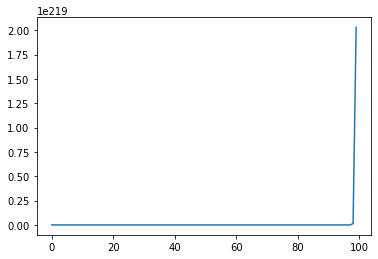

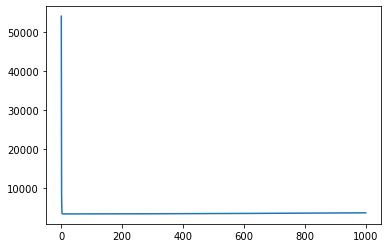

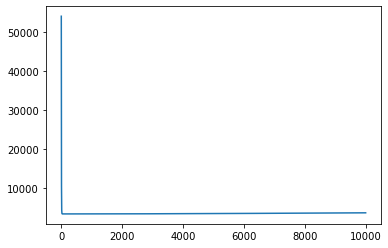

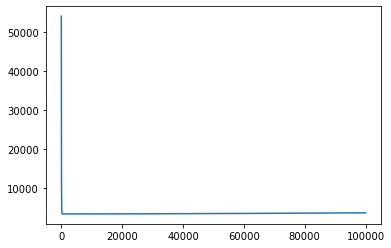

In [ ]:
## TO DO ##
    
    
import matplotlib.pyplot as plt
plt.figure()
plot1 = plt.plot(loss_train1)
plt.figure()
plot2 = plt.plot(loss_train2)
plt.figure()
plot3 = plt.plot(loss_train3)
plt.figure()
plot4 = plt.plot(loss_train4)

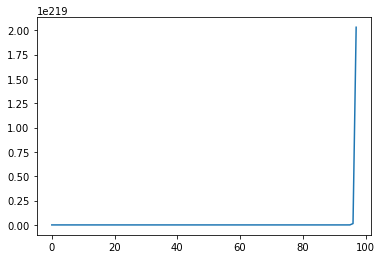

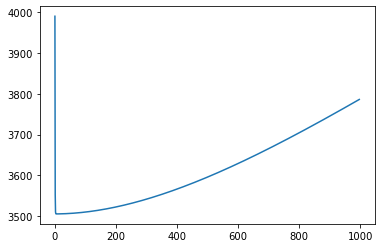

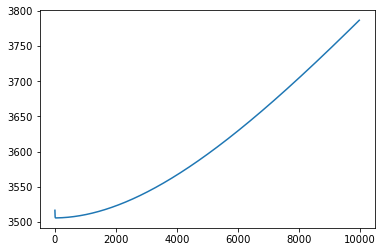

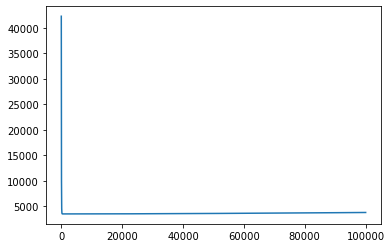

In [ ]:
plt.figure()
plot4 = plt.plot(loss_train1[2:])
plt.figure()
plot4 = plt.plot(loss_train2[2:])
plt.figure()
plot4 = plt.plot(loss_train3[30:])
plt.figure()
plot4 = plt.plot(loss_train4[10:])